In [52]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour, slic

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import scipy.ndimage as ndimage

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


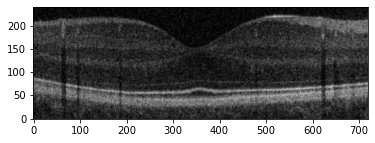

In [2]:
IMAGE_DIR = '../images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax

def crop (image, mask):
    h, w = np.shape(image)
    return image[max(mask[0],0):min(mask[1],h), max(mask[2],0):min(mask[3],w)]

def prep_image (imdir, imname, mask):
    print("Image name (shape) (intensity max, min, mean, std)\n")
    image = np.flipud(crop(imageio.imread(imdir+'/'+imname+".png"), mask))
    print("{} {} ({}, {}, {}, {})".format(imname, np.shape(image), np.max(image), np.min(image), round(np.mean(image),1), round(np.std(image),1)))
    plt.imshow(image, vmin=0, vmax=255, cmap='gray', origin='lower') # use vmin and vmax to stop imshow from scaling
    plt.show()
    return image

image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

[[100.           0.        ]
 [100.           7.27272727]
 [100.          14.54545455]
 [100.          21.81818182]
 [100.          29.09090909]
 [100.          36.36363636]
 [100.          43.63636364]
 [100.          50.90909091]
 [100.          58.18181818]
 [100.          65.45454545]
 [100.          72.72727273]
 [100.          80.        ]
 [100.          87.27272727]
 [100.          94.54545455]
 [100.         101.81818182]
 [100.         109.09090909]
 [100.         116.36363636]
 [100.         123.63636364]
 [100.         130.90909091]
 [100.         138.18181818]
 [100.         145.45454545]
 [100.         152.72727273]
 [100.         160.        ]
 [100.         167.27272727]
 [100.         174.54545455]
 [100.         181.81818182]
 [100.         189.09090909]
 [100.         196.36363636]
 [100.         203.63636364]
 [100.         210.90909091]
 [100.         218.18181818]
 [100.         225.45454545]
 [100.         232.72727273]
 [100.         240.        ]
 [100.        

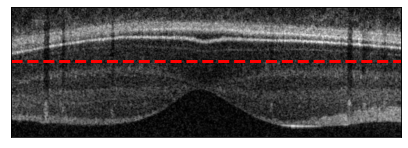

In [19]:



# img = data.astronaut()
img = image
# img = rgb2gray(img)

r = np.linspace(100, 100, 100)
c = np.linspace(0, 720, 100)
init = np.array([r, c]).T
print(init)


snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

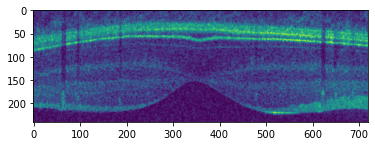

In [22]:
plt.imshow(img)

In [49]:
image_slic = slic(img,n_segments=5000)

In [50]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

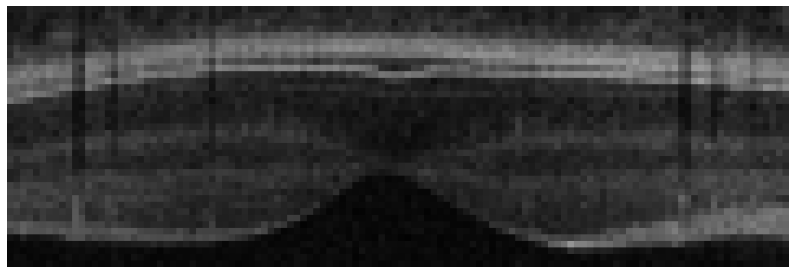

In [51]:

image_show(color.label2rgb(image_slic, image, kind='avg'));

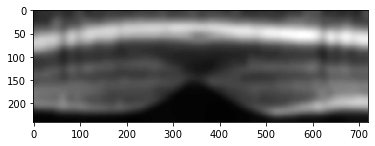

In [57]:
img = ndimage.gaussian_filter(img, sigma=(3, 3), order=0)
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.show()